# Check Loading starfish models compared to manually convolving.



In [1]:
from spectrum_overload import Spectrum
from utilities.phoenix_utils import load_starfish_spectrum

from astropy.io import fits
import matplotlib.pyplot as plt

/home/jneal/Phd/Codes/companion_simulations/utilities/__init__.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykerne

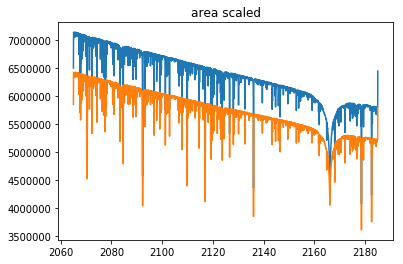

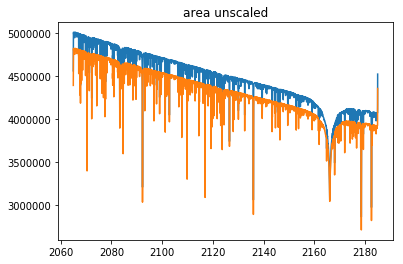

In [2]:
params1 = [6000, 4.5, 0.0]
params2 = [5800, 4.5, 0.0]
gamma = -90
rv = 25

normalization_limits = [2000, 2300]

mod1_spec_scaled = load_starfish_spectrum(params1, limits=normalization_limits,
                                       hdr=True, normalize=False, area_scale=True,
                                       flux_rescale=True)
mod1_spec_unscaled = load_starfish_spectrum(params1, limits=normalization_limits,
                                       hdr=True, normalize=False, area_scale=False,
                                       flux_rescale=True)

mod2_spec_scaled = load_starfish_spectrum(params2, limits=normalization_limits,
                                       hdr=True, normalize=False, area_scale=True,
                                       flux_rescale=True)
mod2_spec_unscaled = load_starfish_spectrum(params2, limits=normalization_limits,
                                       hdr=True, normalize=False, area_scale=False,
                                       flux_rescale=True)


for name, mod1_spec, mod2_spec in zip(["area scaled", "area unscaled"],
                                  [mod1_spec_scaled, mod1_spec_unscaled],
                                  [mod2_spec_scaled, mod2_spec_unscaled]):

    mod1_spec = mod1_spec.remove_nans()
    mod2_spec = mod2_spec.remove_nans()
    mod1_spec.wav_select(2000, 2200)
    mod2_spec.wav_select(2000, 2200)

    plt.plot(mod1_spec.xaxis, mod1_spec.flux, label="mod1")
    plt.plot(mod2_spec.xaxis, mod2_spec.flux, label="mod2")
    plt.title(name)
    plt.show()




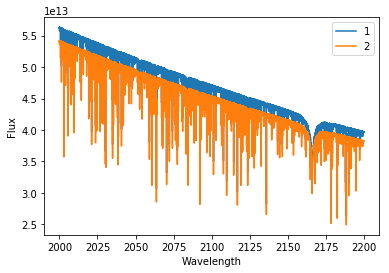

In [3]:
# Manually load Phoenix spectra
import simulators
#phoenix_path = simulators...
phoenix_path = "/home/jneal/Phd/data/PHOENIX-ALL/PHOENIX/"

phoenix_1 = "Z-0.0/lte06000-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
phoenix_2 = "Z-0.0/lte05800-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"

wav = fits.getdata(phoenix_path + "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits")
phoenix1 = fits.getdata(phoenix_path + phoenix_1)
phoenix2 = fits.getdata(phoenix_path + phoenix_2)

spec1 = Spectrum(xaxis=wav/10, flux=phoenix1)
spec2 = Spectrum(xaxis=wav/10, flux=phoenix2)
spec1.wav_select(2000,2200)
spec2.wav_select(2000,2200)
spec1.plot(label="1")
spec2.plot(label="2")

plt.legend()
plt.show()



100%|██████████| 12499/12499 [00:00<00:00, 25368.43it/s]


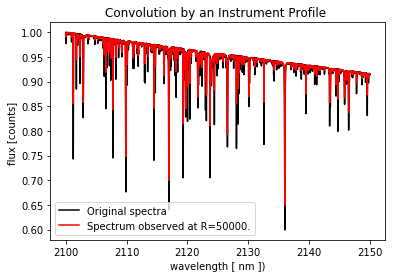

100%|██████████| 12499/12499 [00:00<00:00, 23875.90it/s]


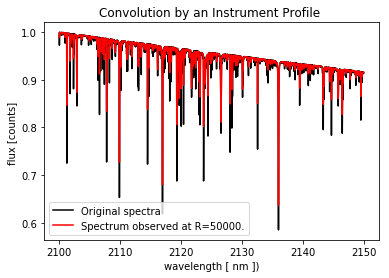

In [4]:
from Convolution.IP_multi_Convolution import ip_convolution, convolve_spectrum

# Convolve to 50000
conv1 = convolve_spectrum(spec1, [2100, 2150], 50000, numProcs=4)
conv2 = convolve_spectrum(spec2, [2100, 2150], 50000, numProcs=4)


In [5]:
(1e12 + conv1).plot(label="1")
(1e12 + conv2).plot(label="2")
conv3.plot(label="3")
conv4.plot(label="4")
plt.legend()
plt.show()

(conv3-conv1).plot()
plt.show()

NameError: name 'conv3' is not defined

In [ ]:
# Comparion to Starfish
conv1.plot(label="phoenix")
mod1_spec_unscaled.wav_select(2100, 2150)
mod1_spec_unscaled.plot(label="starfish")
plt.legend()
plt.show()


(conv1 / 1e11).plot(label="phoenix")
(mod1_spec_unscaled / 1e4).plot(label="starfish")
plt.legend()
plt.show()

In [ ]:
((conv1 / 1e7)/(mod1_spec_unscaled)).plot()
plt.show()

In [ ]:
# Seems to be a 1e7 factor between them here. (This should not matter afternormalization I think)